# A2a Signal Detection
Ryan Lin

In [1]:
from A2a_rhl72 import *
import matplotlib.pyplot as plt


## Wave Forms
---

$$
y[t] = x[t] + \epsilon[t]
$$

- y is the wave 
- x is the events 
- epsilon is the noise


## Impulse Representation

Each event x is modeled as an impulse with a fixed amplitude **A**.

In discrete terms it could be represented as

$$
\delta [t - \tau]
$$

The full signal can be computed as 
$$
x[t] = \sum_{i=1}^{N} A * \delta [t - \tau_i]
$$

## Types of Noise

### **Gaussian Noise**
Event $\epsilon[t]$ is sampled from a normal distribution

$$
\epsilon[t] \sim \mathcal{N}(0,\sigma^2)
$$

### **Uniform Noise**
Event $\epsilon[t]$ is drawn from a uniform distribution with zero mean and a range defined by $\sigma$

$$
[-\frac{\sigma}{2}, \frac{\sigma}{2}]
$$

In [ ]:
import numpy as np

def genwaveform(N=100, alpha=0.1, A=1, mu=0, sigma=1, noisetype='Gaussian'):
    """
    Generates a wave with 
    N ~ Length of time.
    alpha ~ Event probability of an event.
    A ~ Amplitude of event.
    mu ~ Center of wave.
    sigma ~ Noise Standard Deviation.
    noisetype ~ Gaussian or Uniform.
    """

    ## Generate Signal locations
    events = (np.random.rand(N) < alpha).astype(int)
    
    # Scale them up to A
    events*=A

    ## Generate Noise

    if noisetype == 'Gaussian':
        noise = np.random.uniform(mu - sigma/2, mu + sigma/2, N)  
    elif noisetype == 'Uniform':
        noise = np.random.uniform(mu - sigma/2, mu + sigma/2, N)  
    else:
        print("Unsuppported Noise Type: {noisetype}")
    
    ## Create wave by adding them

    wave = noise + events

    return wave

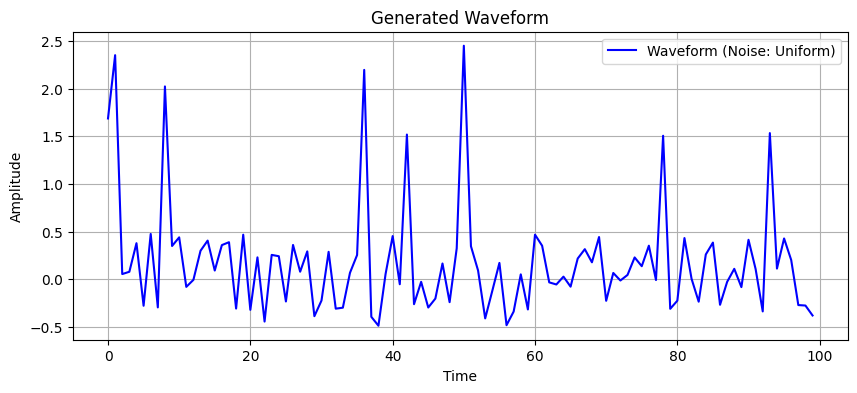

In [2]:
def plot_waveform(N=100, alpha=0.1, A=1, mu=0, sigma=1, noisetype='Gaussian'):
    """
    Generates and plots the waveform.
    """
    wave = genwaveform(N, alpha, A, mu, sigma, noisetype)
    plt.figure(figsize=(10, 4))
    plt.plot(wave, label=f'Waveform (Noise: {noisetype})', color='b')
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Generated Waveform")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
plot_waveform(N=100, alpha=0.1, A=2, mu=0, sigma=1, noisetype='Uniform')